In [80]:
import numpy as np # linear algebra
import pandas as pd 

In [81]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [82]:
text=pd.read_excel("../content/SpeckledBand (1).xlsx")
text.head()

,ID(0),Property(1),原文(2),統制ラベル(3),対象ID(4),evidence(5),絶対時間(6),Type(7),担当,メモ
0,1,対象文,ヘレンがホームズの家にやってくる,NaN,NaN,Helen comes to Holmes' house,NaN,NaN,川村,川村分対応済み(5/23)
1,NaN,Type,NaN,NaN,NaN,NaN,NaN,NaN,川村,Type欄増やしました．
2,NaN,情報源,NaN,NaN,NaN,NaN,NaN,NaN,川村,川村の書き方は，TypeにAbstractTimeとある場合は，Whenのラベルを残す，というものです．
3,NaN,hasPredicate,来る,NaN,NaN,come,NaN,NaN,川村,但し，Typeは基本的に初出のものにしか入れてません(5/23)
4,NaN,主語/Who（誰が）,ヘレン,NaN,NaN,Helen,NaN,Person,川村,NaN


In [83]:
text['evidence(5)']= text['evidence(5)'].astype(str)

In [84]:
doc = nlp("It was the speckled band")

for tok in doc:
  print(tok.text, "------>", tok.dep_)

It ------> nsubj
was ------> ROOT
the ------> det
speckled ------> amod
band ------> attr


In [85]:
def get_entities(sent):
 
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    
  prv_tok_text = ""   

  prefix = ""
  modifier = ""

  
  
  for tok in nlp(sent):
    
    if tok.dep_ != "punct":
     
      if tok.dep_ == "compound":
        prefix = tok.text
        
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
     
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
       
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
     
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

     
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      
      
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
 

  return [ent1.strip(), ent2.strip()]

In [86]:
get_entities("the poisonous viper that bite Julia ")

['poisonous  that', 'Julia']

In [87]:
text[0:36]

,ID(0),Property(1),原文(2),統制ラベル(3),対象ID(4),evidence(5),絶対時間(6),Type(7),担当,メモ
0,1,対象文,ヘレンがホームズの家にやってくる,NaN,NaN,Helen comes to Holmes' house,NaN,NaN,川村,川村分対応済み(5/23)
1,NaN,Type,NaN,NaN,NaN,nan,NaN,NaN,川村,Type欄増やしました．
2,NaN,情報源,NaN,NaN,NaN,nan,NaN,NaN,川村,川村の書き方は，TypeにAbstractTimeとある場合は，Whenのラベルを残す，というものです．
3,NaN,hasPredicate,来る,NaN,NaN,come,NaN,NaN,川村,但し，Typeは基本的に初出のものにしか入れてません(5/23)
4,NaN,主語/Who（誰が）,ヘレン,NaN,NaN,Helen,NaN,Person,川村,NaN
5,NaN,Whom（誰に）,NaN,NaN,NaN,nan,NaN,NaN,川村,NaN
6,NaN,Where（どこで）,NaN,NaN,NaN,nan,NaN,NaN,川村,NaN
7,NaN,From（どこから）,NaN,NaN,NaN,nan,NaN,NaN,川村,NaN
8,NaN,To（どこへ）,ホームズの家,NaN,NaN,house of Holmes,NaN,Place,川村,NaN
9,NaN,When（いつ）,NaN,NaN,NaN,nan,1883-04-01T10,NaN,川村,NaN


In [88]:
get_entities("a fan that was installed between Julia's former room and her stepfather's Dr. Roylott.")

['that', 'former  room']

In [89]:
entity_pairs = []

for i in tqdm(text["evidence(5)"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 6063/6063 [00:24<00:00, 251.91it/s]


In [90]:
entity_pairs[0:15]


[['Helen', 'house'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', 'Holmes'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', '']]

In [91]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [92]:
get_relation("Julia was killed with the Speckled Band")

'killed with'

In [93]:
relations = [get_relation(i) for i in tqdm(text['evidence(5)'])]

100%|██████████| 6063/6063 [00:25<00:00, 235.82it/s]


In [94]:
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_text = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [95]:
G=nx.from_pandas_edgelist(kg_text, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

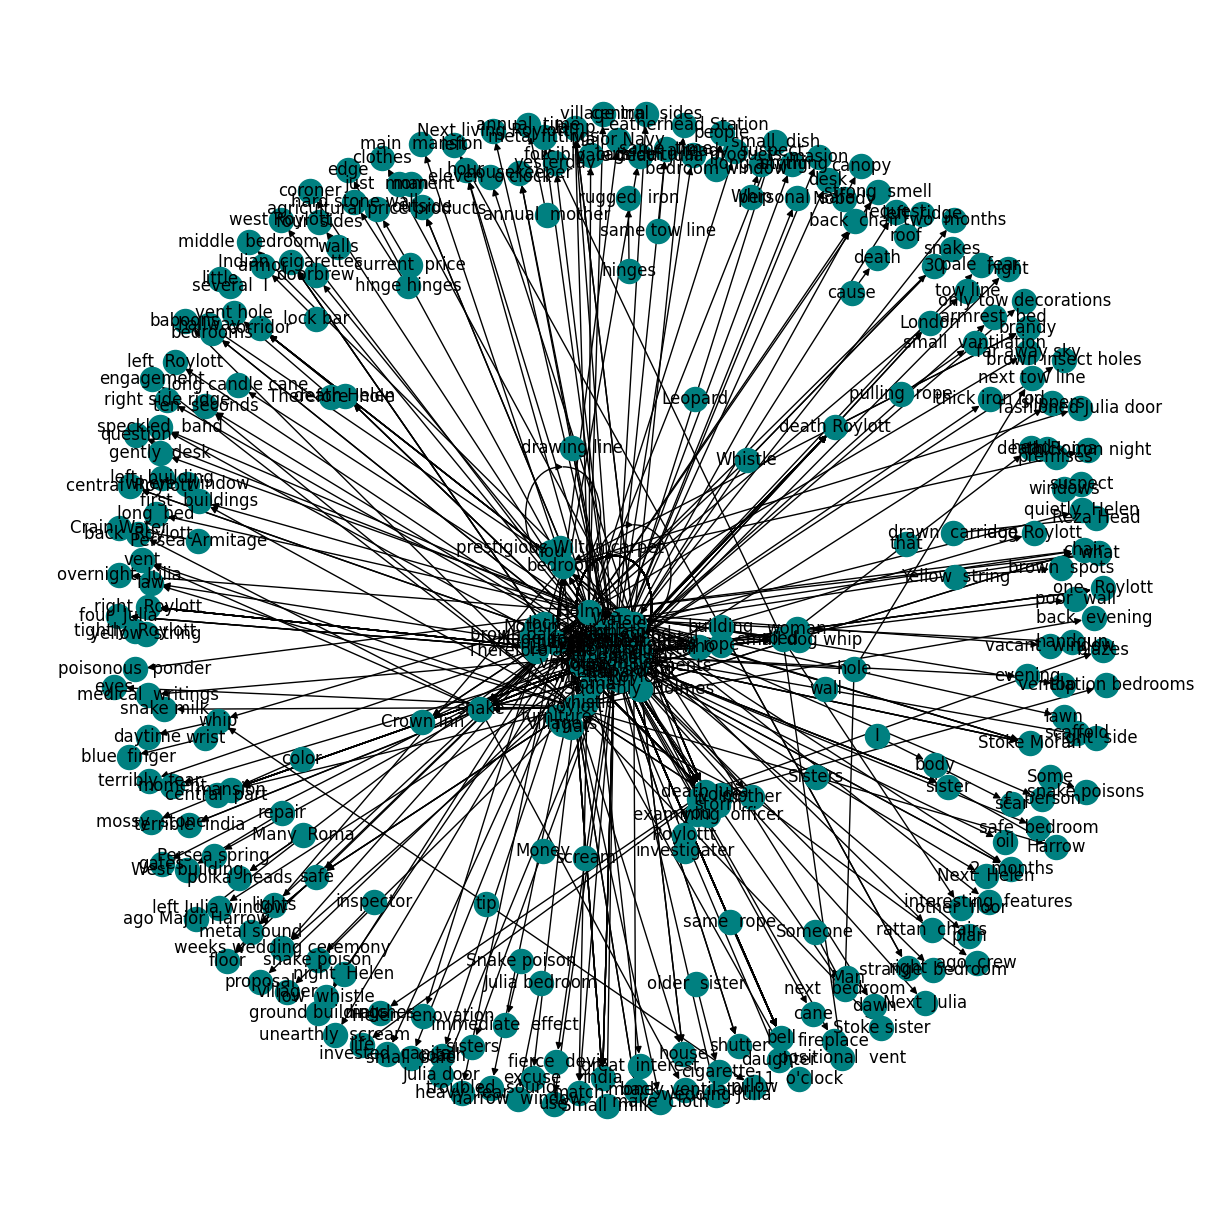

In [96]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='teal', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [97]:
kg_text[0:6000]

,source,target,edge
0,Helen,house,comes to
1,,,nan
2,,,nan
3,,,come
4,,,Helen
...,...,...,...
5995,,,nan
5996,,,nan
5997,,death Roylott,day of
5998,,,nan


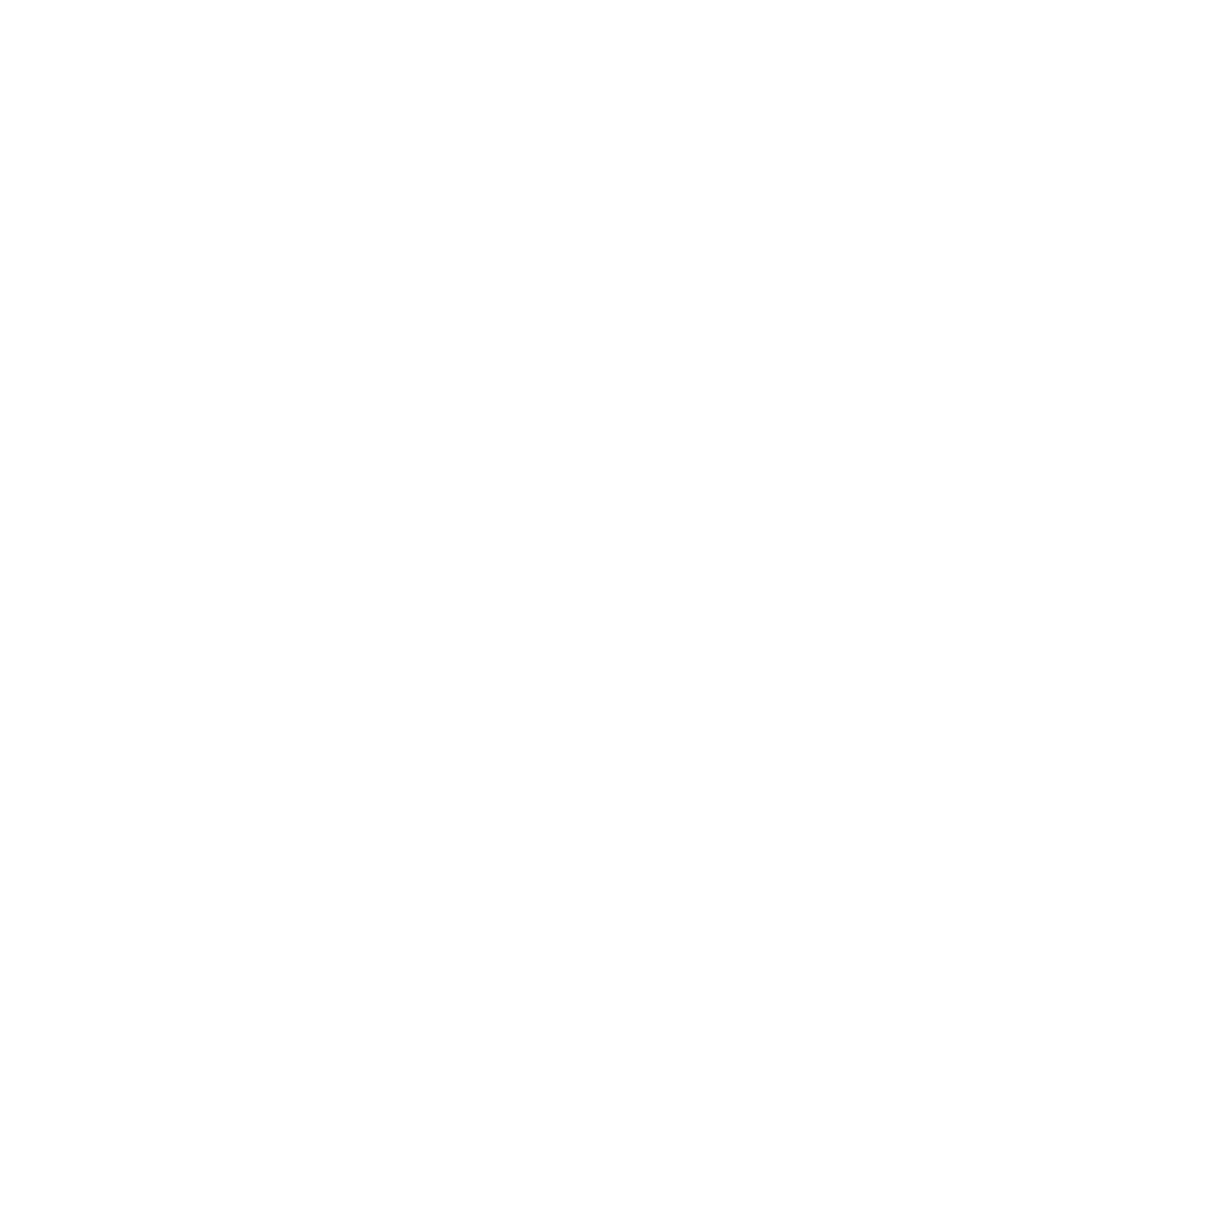

In [102]:
G=nx.from_pandas_edgelist(kg_text[kg_text['edge']=="death Roylott"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.8)
nx.draw(G, with_labels=True, node_color='teal', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

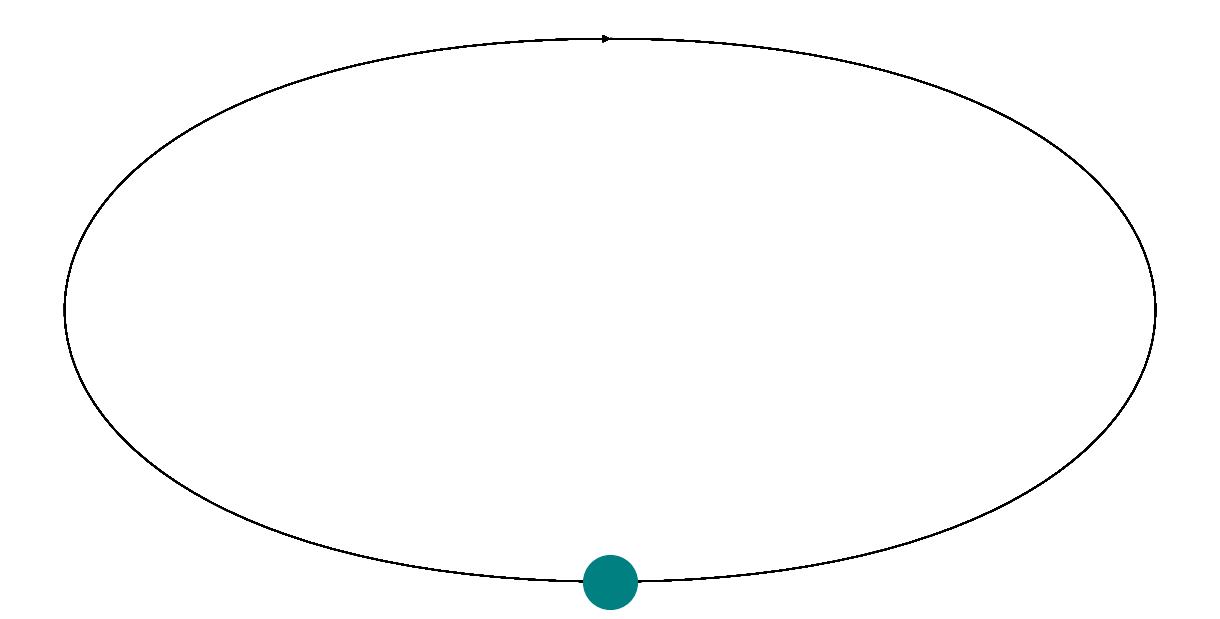

In [104]:
G=nx.from_pandas_edgelist(kg_text[kg_text['edge']=="Roylott"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,6))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='teal', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [106]:
kg_text[0:6000]

,source,target,edge
0,Helen,house,comes to
1,,,nan
2,,,nan
3,,,come
4,,,Helen
...,...,...,...
5995,,,nan
5996,,,nan
5997,,death Roylott,day of
5998,,,nan


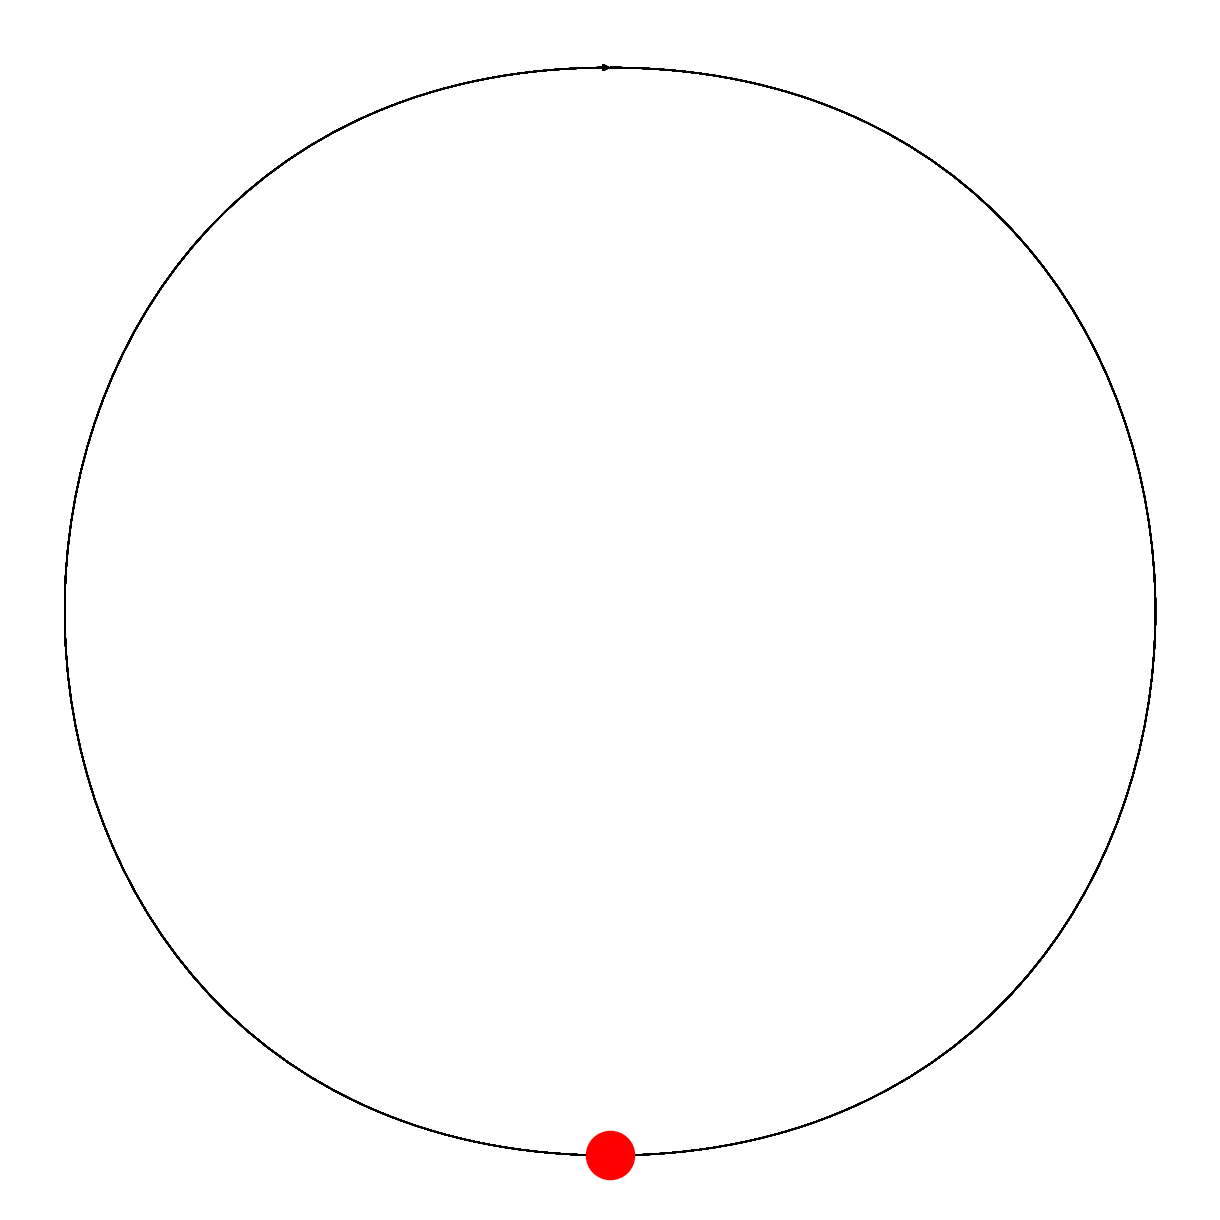

In [101]:
G=nx.from_pandas_edgelist(kg_text[kg_text['edge']=="Julia"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1200, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()